In [1]:
from imageClassifier import ImageClassifier
classifier = ImageClassifier()

In [2]:
import torch
from custom_dataset import MyDataset
full_dataset = MyDataset(
	csv_file='./data/MNIST.csv', 
	root_dir='./data',
	transform=classifier.model.transform
)

# 学習データ、検証データに 8:2 の割合で分割する。
train_size = int(0.8 * len(full_dataset))
test_size  = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size]
)

#----------------------------------------------------------
# 学習用／評価用のデータセットの作成
# ハイパーパラメータなどの設定値
num_batch = 1         # 一度に処理する画像の枚数

# データローダー
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = num_batch,
    shuffle = True)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,     
    batch_size = num_batch,
    shuffle = True)

In [3]:
print(test_dataset[0][0].shape)

torch.Size([4, 52, 52])


In [4]:
incorrect = []
for image, label in test_dataloader:
	pred = classifier.predict(image[0])
	if pred != label[0]:
		incorrect.append([image[0], label[0], pred])
		print(f"prediction = {pred}, correct label = {label[0]}")

prediction = 5, correct label = 8
prediction = 2, correct label = 8
prediction = 7, correct label = 9
prediction = 7, correct label = 3
prediction = 4, correct label = 9
prediction = 4, correct label = 6
prediction = 6, correct label = 0
prediction = 4, correct label = 8
prediction = 5, correct label = 3
prediction = 3, correct label = 9
prediction = 7, correct label = 3
prediction = 8, correct label = 3
prediction = 9, correct label = 8
prediction = 0, correct label = 4
prediction = 7, correct label = 9
prediction = 7, correct label = 4
prediction = 9, correct label = 3
prediction = 1, correct label = 4
prediction = 8, correct label = 5
prediction = 2, correct label = 7
prediction = 1, correct label = 9
prediction = 9, correct label = 4
prediction = 8, correct label = 3
prediction = 2, correct label = 7
prediction = 9, correct label = 8
prediction = 5, correct label = 6
prediction = 2, correct label = 3
prediction = 2, correct label = 3
prediction = 9, correct label = 8
prediction = 3

In [5]:
print(f"{len(incorrect)} / {len(test_dataloader)}, accuracy = {1-len(incorrect)/len(test_dataloader)}")
iterator = iter(incorrect)

69 / 13937, accuracy = 0.9950491497452824


prediction = 5, correct label= 8


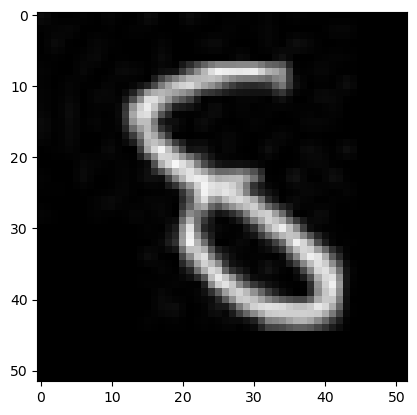

In [6]:
from torchvision import transforms
import matplotlib.pyplot as plt
image, label, pred = next(iterator)
print(f"prediction = {pred}, correct label= {label}")
pil = transforms.ToPILImage()(image)
# pil = transforms.Resize(classifier.model.image_size)(pil)
plt.imshow(pil)
# plt.imshow(image.numpy().reshape(classifier.model.image_size), cmap='gray')

prediction = 1
RGBA


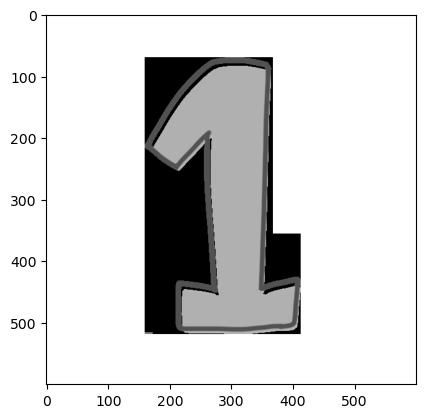

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('illustrain01-moji01.png')
# plt.imshow(image)
plt.imshow(image.convert('L'), cmap='gray')
# plt.imshow(transforms.Grayscale()(image), cmap='gray')
pred = classifier.predict(image)
print(f"prediction = {pred}")
print(image.mode)
# transforms.ToTensor()(image)[0]